<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/10_Vietnamese_dishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/250
27/27 [==============================] - 6s 85ms/step - loss: 2.3371 - accuracy: 0.1244 - val_loss: 2.3204 - val_accuracy: 0.1065
Epoch 2/250
27/27 [==============================] - 2s 76ms/step - loss: 2.2979 - accuracy: 0.1371 - val_loss: 2.2254 - val_accuracy: 0.1479
Epoch 3/250
27/27 [==============================] - 2s 76ms/step - loss: 2.1809 - accuracy: 0.1891 - val_loss: 2.1204 - val_accuracy: 0.1568
Epoch 4/250
27/27 [==============================] - 2s 78ms/step - loss: 2.1031 - accuracy: 0.2069 - val_loss: 2.0927 - val_accuracy: 0.2071
Epoch 5/250
27/27 [==============================] - 3s 127ms/step - loss: 2.0709 - accuracy: 0.2170 - val_loss: 2.2242 - val_accuracy: 0.1775
Epoch 6/250
27/27 [==============================] - 2s 77ms/step - loss: 2.0661 - accuracy: 0.2703 - val_loss: 1.9491 - val_accuracy: 0.2811
Epoch 7/250
27/27 [==============================] - 2s 77ms/step - loss: 1.9769 - accuracy: 0.2944 - val_loss: 1.9512 - val_accuracy: 0.2899
Epoch

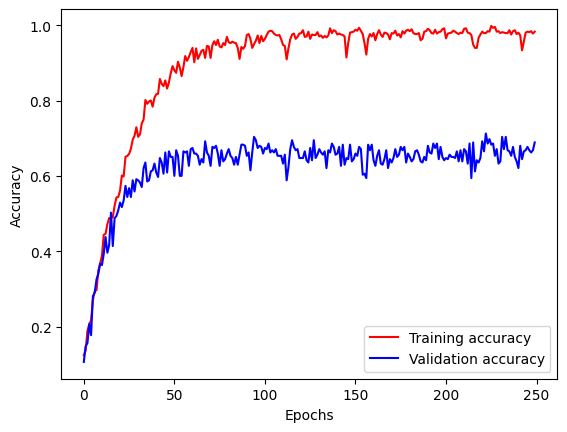

In [ ]:

# Nhập các thư viện cần thiết
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

# Đặt thư mục dữ liệu và tham số
folder = '/content/drive/MyDrive/PIC_AI/food/data_food/'
input_shape = (100,100, 3)
num_classes = 11

# Tải và tiền xử lý dữ liệu
photos, labels = list(), list()
for file in listdir(folder):
    output = 0.0
    if  file.startswith('banhbeo'):
        output = 1.0
    elif file.startswith('banhgio'):
        output = 2.0
    elif file.startswith('banhmi'):
        output = 3.0
    elif file.startswith('banhtet'):
        output = 4.0
    elif file.startswith('banhxeo'):
        output = 5.0
    elif file.startswith('bundaumamtom'):
        output = 6.0
    elif file.startswith('cakho'):
        output = 7.0
    elif file.startswith('chaolong'):
        output = 8.0
    elif file.startswith('nemchua'):
        output = 9.0
    elif file.startswith('pho'):
        output = 10.0

    photo = load_img(folder + file, target_size=input_shape)
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)


# Tách dữ liệu thành tập huấn luyện và xác thực
X_train, X_val, y_train, y_val = train_test_split(photos, labels, test_size=0.3, random_state=100)

# Gia tăng dữ liệu
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)


# Tạo mô hình
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization
model.add(Dense(11, activation='softmax'))




# Biên dịch mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Huấn luyện mô hình bằng cách tăng dữ liệu
train = model.fit(datagen.flow(X_train, y_train, batch_size=30), epochs=250, validation_data=(X_val, y_val))


# Đánh giá mô hình CNN
score = model.evaluate(X_val, y_val, verbose=0)

# Đánh giá mô hình CNN
loss, accuracy_val = model.evaluate(X_val, y_val)

a, b = model.evaluate(X_train, y_train)

print("Loss:", a)
print("Accuracy:", b)



# Lưu mô hình CNN đã đào tạo
model.save('/content/drive/MyDrive/colab/10_Vietnamese_dishes.h5')

accuracy = train.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')

val_accuracy = train.history['val_accuracy']  
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')  

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 95ms/step
banhbeo


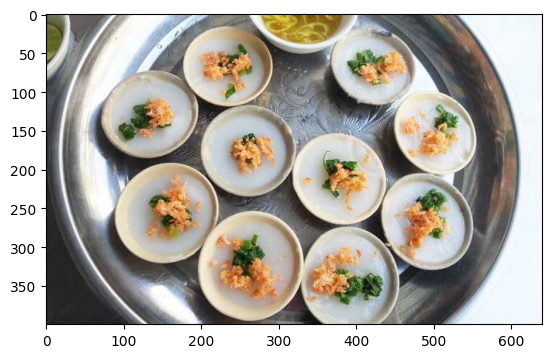

1/1 [==============================] - 0s 19ms/step
banhmi


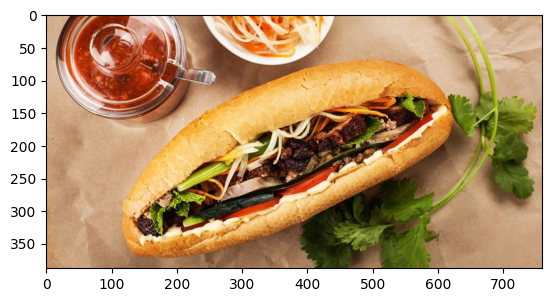

1/1 [==============================] - 0s 18ms/step
banhxeo


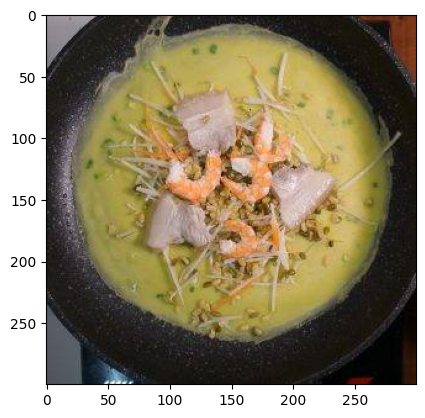

1/1 [==============================] - 0s 21ms/step
pho


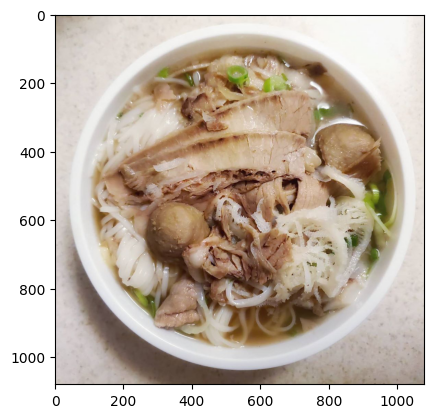

1/1 [==============================] - 0s 19ms/step
banhgio


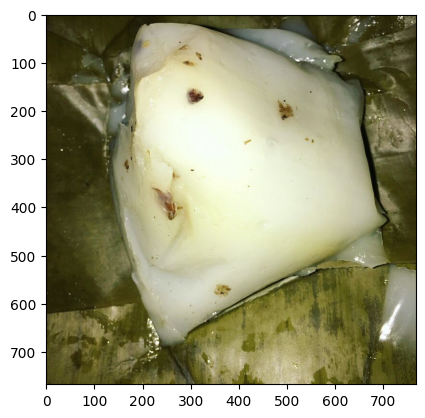

1/1 [==============================] - 0s 20ms/step
banhtet


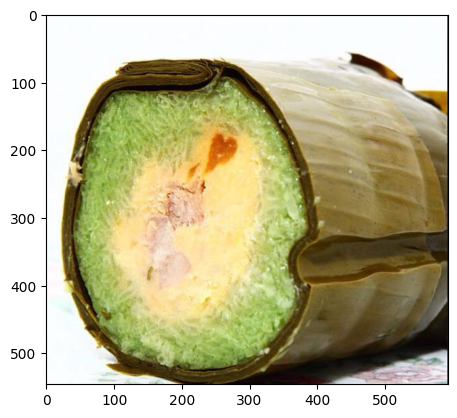

1/1 [==============================] - 0s 31ms/step
bundaumamtom


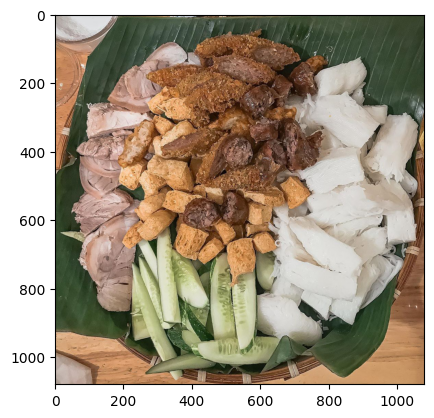

1/1 [==============================] - 0s 35ms/step
cakho


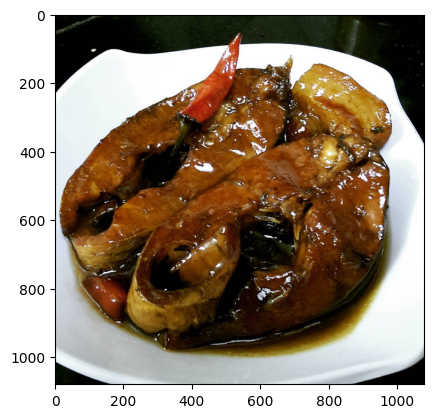

1/1 [==============================] - 0s 29ms/step
chaolong


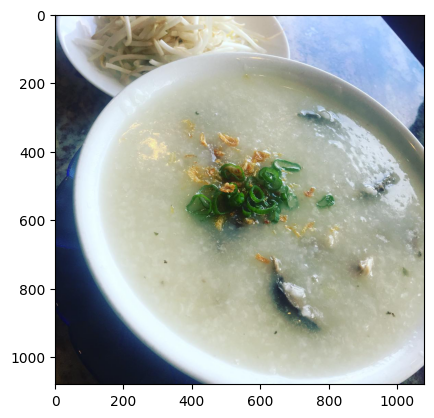

1/1 [==============================] - 0s 26ms/step
nemchua


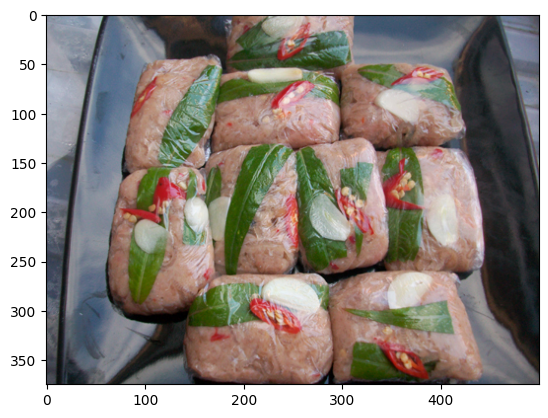

In [ ]:

#kiểm tra
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/drive/MyDrive/PIC_TEST/food2/'
for file in listdir(folder):
  if not file.endswith('.jpg'):
    continue # Bỏ qua các thư mục và tệp không phải hình ảnh
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name= {1: 'banhbeo', 2: 'banhgio', 3: 'banhmi', 4: 'banhtet', 5: 'banhxeo',
              6:'bundaumamtom', 7: 'cakho', 8: 'chaolong', 9: 'nemchua', 10: 'pho', 0: 'Unknown'}  # Include an entry for Unknown label
  print(class_name[result])
  plt.show()